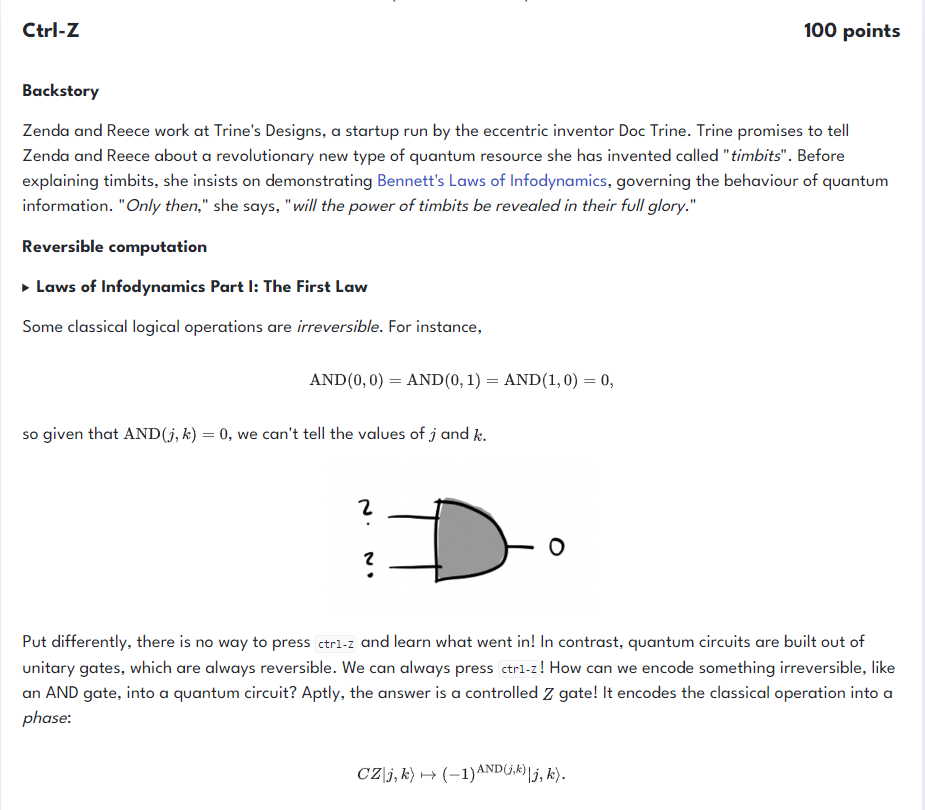

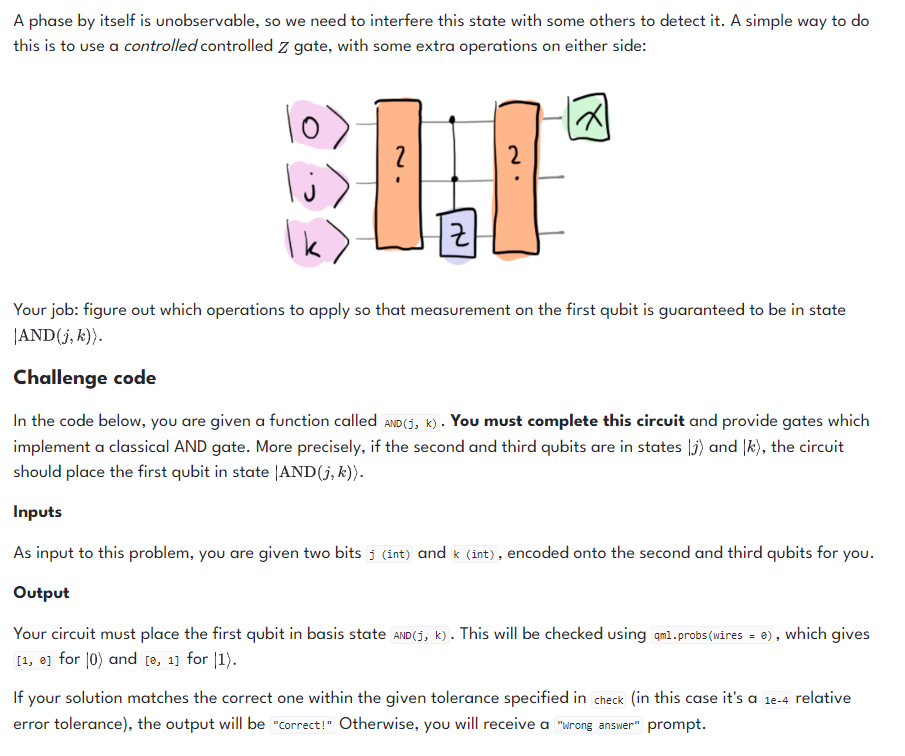

In [7]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def AND(j, k):
    """Implements the AND gate using quantum gates and computes j AND k.

    Args:
        j (int): A classical bit, either 0 or 1. 
        k (int): A classical bit, either 0 or 1. 

    Returns:
        float: The probabilities of measurement on wire 0.
    """

    if j == 1:
        qml.PauliX(wires=1)
    if k == 1:
        qml.PauliX(wires=2)


    # Put your code here #

    qml.Hadamard(wires=0)
    qml.ControlledQubitUnitary(qml.CZ(wires=[1,2]).matrix(), control_wires=[0], wires=[1,2])
    qml.Hadamard(wires=0) 

    # Your code here #

    return qml.probs(wires=0)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    j, k = json.loads(test_case_input)
    output = AND(j, k).tolist()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-4), "Your classical operation isn't behaving correctly!"


test_cases = [['[0, 0]', '[1, 0]'], ['[1, 1]', '[0, 1]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)
        print(output)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[0, 0]'...
[0.9999999999999996, 0.0]
Correct!
Running test case 1 with input '[1, 1]'...
[0.0, 0.9999999999999996]
Correct!
